# **EDA**







## Данные

### Импорт необходимых библиотек 

In [15]:
#@title
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as st

%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd

### Чтение csv-файла с данными и форматирование значений в вещественные числа

In [16]:
#@title
df = pd.read_csv('dataset.csv') 
df = df.drop(['Nan'], axis='columns')

df = df[df.game_number != 'S'][['game_number', 'crash', 'total_bank']]

df['crash'] = df.crash.astype('float64')
df['total_bank'] = df.total_bank.astype('float64')
df['game_number'] = df.game_number.astype('int64')

df.head()

,game_number,crash,total_bank
1,700001,1.03,235.25
2,700002,1.61,5.33
3,700003,7.32,-68.03
4,700004,2.19,-50.07
5,700005,1.03,218.15


### Формирование отдельных списков значений

In [17]:
#@title
x = range(1,len(df['crash'])+1)
b = df['crash']
b1 = sorted(b)

d = df['total_bank']
d2 = sorted(d)

sum = [0]
for el in d:
    sum.append(sum[-1] + el)


## Создание таблицы с главными аналитическими данными по заданным значениям

In [18]:
#@title
data = {'' : ['Crash', 'Total bank'],
        'Minimum values': [b1[0], d2[0]],
        'Maximum values' : [b1[-1], d2[-1]],
        'Median values' : [st.median(b1), st.median(d2)]}
frame = pd.DataFrame(data)
frame

,,Minimum values,Maximum values,Median values
0,Crash,1.00,100.00,1.91
1,Total bank,-551.07,2044.69,-13.87


## **Графики**

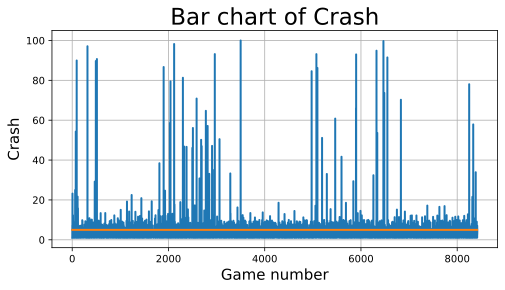

In [19]:
#@title
plt.figure(figsize=(8,4))
plt.title('Bar chart of Сrash', fontsize=23)
plt.plot(b, linewidth=2.0)
s = [5 for i in x]
plt.plot(s, linewidth=2.0)
plt.xlabel('Game number', fontsize=15, color='black')
plt.ylabel('Crash', fontsize=15, color='black')
plt.grid(True)
plt.show()

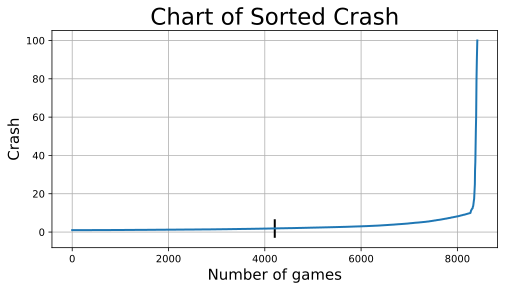

In [25]:
#@title
plt.figure(figsize=(8,4))
plt.title('Chart of Sorted Crash', fontsize=23)
plt.plot(b1, linewidth=2.0)
plt.vlines(len(x)//2, b1[0]-4, b1[-1]/15, linewidth=2.0)
plt.xlabel('Number of games', fontsize=15, color='black')
plt.ylabel('Crash', fontsize=15, color='black')
plt.grid(True)
plt.show()

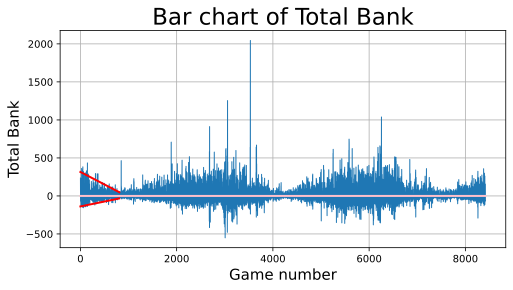

In [21]:
#@title
plt.figure(figsize=(8,4))
plt.title('Bar chart of Total Bank', fontsize=23)
plt.plot(d, linewidth=1)
s = [0 for i in x]
y1 = [-0.33*i+315.5 for i in x[:810]]
y2 = [0.13*i-138.3 for i in x[:806]]
plt.plot(s, linewidth=2.0, color='pink')
plt.plot(y1, linewidth=2.0, color='red')
plt.plot(y2, linewidth=2.0, color='red')
plt.xlabel('Game number', fontsize=15, color='black')
plt.ylabel('Total Bank', fontsize=15, color='black')
plt.grid(True)
plt.show()

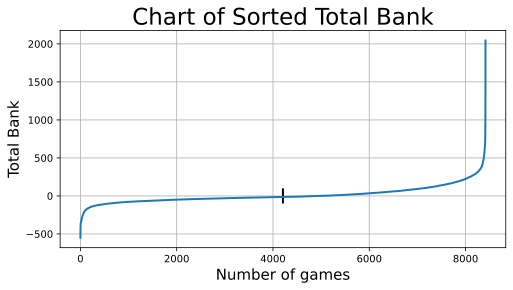

In [22]:
#@title
plt.figure(figsize=(8,4))
plt.title('Chart of Sorted Total Bank', fontsize=23)
plt.plot(d2, linewidth=2.0)
plt.vlines(len(x)//2, b1[0]-100, b1[-1], linewidth=2.0)
plt.xlabel('Number of games', fontsize=15, color='black')
plt.ylabel('Total Bank', fontsize=15, color='black')
plt.grid(True)
plt.show()

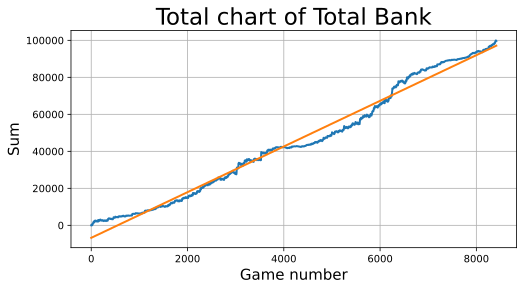

In [23]:
#@title
yy = [(12.34406089964609520848*t-6765.28812321255372808082) for t in x]
plt.figure(figsize=(8,4))
plt.title('Total chart of Total Bank', fontsize=23)
plt.plot(sum, linewidth=2.0)
plt.plot(yy, linewidth=2.0)
plt.xlabel('Game number', fontsize=15, color='black')
plt.ylabel('Sum', fontsize=15, color='black')
plt.grid(True)
plt.show()

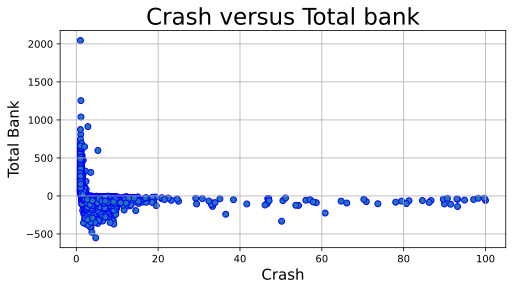

In [24]:
#@title
plt.figure(figsize=(8,4))
plt.title('Crash versus Total bank', fontsize=23)
plt.xlabel('Crash', fontsize=15, color='black')
plt.ylabel('Total Bank', fontsize=15, color='black')
plt.grid(True)
plt.scatter(x = df['crash'], y = df['total_bank'], marker='o', edgecolors='b')